Unicamp - MO826 - Ciência e Visualização de Dados em Saúde

Felipe Marinho Tavares

RA: 265680

Laboratório #3

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Definindo função para análise de dados

In [2]:
def read_and_plot_df(pathdata, dataset_title):
    df = pd.read_csv(pathdata)
    print(f"{pathdata}\n\nhead:")
    display(df.head())
    print("describe:")
    display(df.describe())
    print("correlation matrix:")
    display(df.corr())
    print("correlation matrix heatmap:")
    sn.heatmap(df.corr())
    plt.show()
    c = df.corr().abs()
    s = c.unstack()
    so = s.sort_values(kind="quicksort")
    so = so[(so >= 0.5) & (so < 1.0)][::2]
    
    if so.size == 0:
        print(f'Dentre as variáveis quantitativas de "{dataset_title}", não foram encontrados conjuntos altamente correlacionados\n')
    else:
        print(f'Dentre as variáveis quantitativas de "{dataset_title}", as seguintes parecem ser altamente correlacionadas/associadas (Pearson corr. na range +/- 0.5 e +/- 1.0):\n')
        print(so)
        
    # results in so are in pandas Series. if the same value at the left would be repeteated in the row below, it
    # instead is placed a blank space.

# Zombie Survey Dataset (zombies-survey.csv)

    name - Zombie name
    type - biological, chemical or technological
    gender - the gender before becoming a zombie
    weight - weight in kg
    height - height in m
    GBC - Green Blood Cells (million cells per microliter - mcL)
    GS - Green Substance (g/dL - grams per deciliter)
    PBC - Purple Blood Cells (million cells per microliter - mcL)
    SP - Sticky Paste (g/dL - grams per deciliter)


zombies_raw/zombies-survey.csv

head:


,name,type,gender,height,weight,gbc,gs,pbc,sp
0,Lossack Slossir,biological,male,1.88,109.72,0.8,14,5.1,3.5
1,Hasp Talch,biological,male,1.75,73.62,0.8,14,4.9,3.0
2,Lesprash Rindrad,biological,male,1.88,96.50,0.8,13,4.7,3.2
3,Halceff Gock,biological,male,1.82,99.81,0.8,15,4.6,3.1
4,Moddeche Splud,biological,male,1.77,93.60,0.8,14,5.0,3.6


describe:


,height,weight,gbc,gs,pbc,sp
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.683000,72.428400,4.794667,37.586667,5.843333,3.054000
std,0.099837,15.001481,3.052643,17.644204,0.828066,0.433594
min,1.430000,38.500000,0.400000,10.000000,4.300000,2.000000
25%,1.610000,61.245000,1.200000,16.000000,5.100000,2.800000
50%,1.685000,71.725000,5.200000,43.500000,5.800000,3.000000
75%,1.757500,84.517500,7.200000,51.000000,6.400000,3.300000
max,1.910000,109.720000,10.000000,69.000000,7.900000,4.400000


correlation matrix:


,height,weight,gbc,gs,pbc,sp
height,1.000000,0.922604,0.011768,0.013053,0.011812,0.024915
weight,0.922604,1.000000,0.050625,0.055102,0.037543,0.027108
gbc,0.011768,0.050625,1.000000,0.962757,0.817954,-0.356544
gs,0.013053,0.055102,0.962757,1.000000,0.871754,-0.420516
pbc,0.011812,0.037543,0.817954,0.871754,1.000000,-0.109369
sp,0.024915,0.027108,-0.356544,-0.420516,-0.109369,1.000000


correlation matrix heatmap:


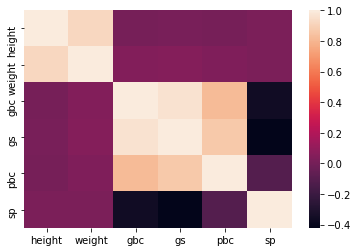

Dentre as variáveis quantitativas de "Zombie Survey Dataset", as seguintes parecem ser altamente correlacionadas/associadas (Pearson corr. na range +/- 0.5 e +/- 1.0):

pbc     gbc       0.817954
gs      pbc       0.871754
weight  height    0.922604
gbc     gs        0.962757
dtype: float64


In [3]:
pathdata = "zombies_raw/zombies-survey.csv"
read_and_plot_df(pathdata, "Zombie Survey Dataset")

---

# Zombie Meals Dataset (zombie-meals.csv)

Meals consumed by zombies and their respective ratings.

    name: name of the meal
    mfr: Manufacturer
    type: cold or hot
    calories: calories per serving
    protein: grams of protein
    fat: grams of fat
    sodium: milligrams of sodium
    fiber: grams of dietary fiber
    carbo: grams of complex carbohydrates
    sugars: grams of sugars
    potass: milligrams of potassium
    vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
    shelf: display shelf (1, 2, or 3, counting from the floor)
    weight: weight in ounces of one serving
    cuts: number of pieces in one serving
    rating: a rating of the meals

Source: based on Cereals dataset. Cited in the tutorial: http://www.stat.yale.edu/Courses/1997-98/101/linmult.htm.

zombies_raw/zombie-meals.csv

head:


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cuts,rating
0,Oven-Grilled Silver Gerbil,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,Thermal-Cooked Chaos Seal,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,Oven-Baked Phase Ferret,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,Simmered Nightmare Havanese,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Ethereal Watercress Soufflé,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


describe:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cuts,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


correlation matrix:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cuts,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


correlation matrix heatmap:


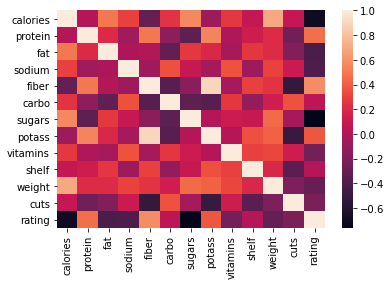

Dentre as variáveis quantitativas de "Zombie Meals Dataset", as seguintes parecem ser altamente correlacionadas/associadas (Pearson corr. na range +/- 0.5 e +/- 1.0):

fiber     protein     0.500330
cuts      fiber       0.513061
potass    protein     0.549407
calories  sugars      0.562340
fiber     rating      0.584160
rating    calories    0.689376
calories  weight      0.696091
sugars    rating      0.759675
potass    fiber       0.903374
dtype: float64


In [4]:
pathdata = "zombies_raw/zombie-meals.csv"
read_and_plot_df(pathdata, "Zombie Meals Dataset")

---

# Zombie Anemia Dataset (zombie-anemia.csv)

Source: based on Anemia Identification dataset.

zombies_raw/zombie-anemia.csv

head:


,gs,mcgs,mcgsc,mcv,gender,anemia
0,14.9,22.7,29.1,83.7,male,not anemia
1,15.9,25.4,28.3,72.0,female,not anemia
2,9.0,21.5,29.6,71.2,female,anemia
3,14.9,16.0,31.4,87.5,female,not anemia
4,14.7,22.0,28.2,99.5,male,not anemia


describe:


,gs,mcgs,mcgsc,mcv
count,1421.000000,1421.000000,1421.000000,1421.000000
mean,13.412738,22.905630,30.251232,85.523786
std,1.974546,3.969375,1.400898,9.636701
min,6.600000,16.000000,27.800000,69.400000
25%,11.700000,19.400000,29.000000,77.300000
50%,13.200000,22.700000,30.400000,85.300000
75%,15.000000,26.200000,31.400000,94.200000
max,16.900000,30.000000,32.500000,101.600000


correlation matrix:


,gs,mcgs,mcgsc,mcv
gs,1.000000,0.014081,-0.042597,-0.025885
mcgs,0.014081,1.000000,0.018795,-0.015948
mcgsc,-0.042597,0.018795,1.000000,0.068450
mcv,-0.025885,-0.015948,0.068450,1.000000


correlation matrix heatmap:


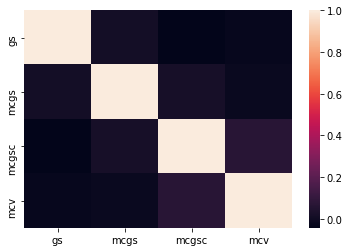

Dentre as variáveis quantitativas de "Zombie Anemia Dataset", não foram encontrados conjuntos altamente correlacionados



In [5]:
pathdata = "zombies_raw/zombie-anemia.csv"
read_and_plot_df(pathdata, "Zombie Anemia Dataset")

---

# Zombie Diet Dataset (zombie-diet.csv)

Dietary habits of zombies.

    dietary classes: if consumed at least once a week value=1 else value=0.
        bitter herb
        slugs
        cooked veg
        giant meat
        raw veg
        dessert
        potatoes
        green meat
        eggs
        beans
        honey
        fish
        milk
        chili
        fried veg

    cups water: average of cups of water per day.

    region: the region where the zombie lived most of its life.


zombies_raw/zombie-diet.csv

head:


,bitter herb,slugs,cooked veg,giant meat,raw veg,dessert,potatoes,green meat,eggs,beans,honey,fish,milk,chili,fried veg,cups water,region
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,5,north
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,5,north
2,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,1,forest
3,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,5,north
4,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,5,north


describe:


,bitter herb,slugs,cooked veg,giant meat,raw veg,dessert,potatoes,green meat,eggs,beans,honey,fish,milk,chili,fried veg,cups water
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,0.742574,0.128713,0.435644,3.841584
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,0.439397,0.336552,0.498314,2.033385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


correlation matrix:


,bitter herb,slugs,cooked veg,giant meat,raw veg,dessert,potatoes,green meat,eggs,beans,honey,fish,milk,chili,fried veg,cups water
bitter herb,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.048973,0.207208,0.455020,0.394009
slugs,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,0.292569,0.031586,-0.135934,-0.206686
cooked veg,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.221090,-0.155610,-0.514650,-0.224918
giant meat,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.210026,0.163928,0.574906,0.214196
raw veg,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.009482,0.063274,-0.349768,0.043712
dessert,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.034642,-0.224308,-0.111866,-0.360638
potatoes,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,0.018947,-0.309794,0.144790,-0.099723
green meat,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,0.310368,0.069430,0.344010,-0.193476
eggs,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,0.731762,0.101733,0.356976,-0.432856
beans,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.088952,0.124068,0.204125,0.369868


correlation matrix heatmap:


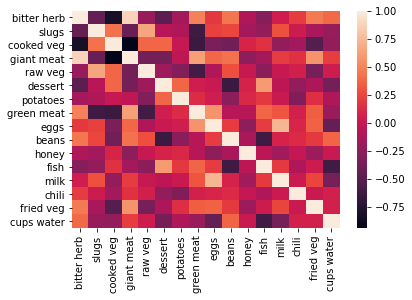

Dentre as variáveis quantitativas de "Zombie Diet Dataset", as seguintes parecem ser altamente correlacionadas/associadas (Pearson corr. na range +/- 0.5 e +/- 1.0):

fried veg   cooked veg     0.514650
            giant meat     0.574906
eggs        green meat     0.575085
raw veg     green meat     0.594311
fish        dessert        0.604492
cups water  fish           0.605652
green meat  slugs          0.613631
beans       fish           0.617219
green meat  giant meat     0.628168
dessert     beans          0.637506
green meat  cooked veg     0.642150
raw veg     slugs          0.656553
eggs        milk           0.731762
cooked veg  bitter herb    0.817382
giant meat  bitter herb    0.878503
            cooked veg     0.938848
dtype: float64


In [6]:
pathdata = "zombies_raw/zombie-diet.csv"
read_and_plot_df(pathdata, "Zombie Diet Dataset")